## Build a neural network model using a small dataset using existing libraries, and explain and visualise the learning process, including weights and activations.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import layers, models

In [22]:
X, y = make_moons(n_samples=400, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
inputs = layers.Input(shape=(X_train.shape[1],), name="input_layer")
x = layers.Dense(8, activation='relu', name='hidden_1')(inputs)
x = layers.Dense(4, activation='relu', name='hidden_2')(x)
outputs = layers.Dense(1, activation='sigmoid', name='output_layer')(x)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

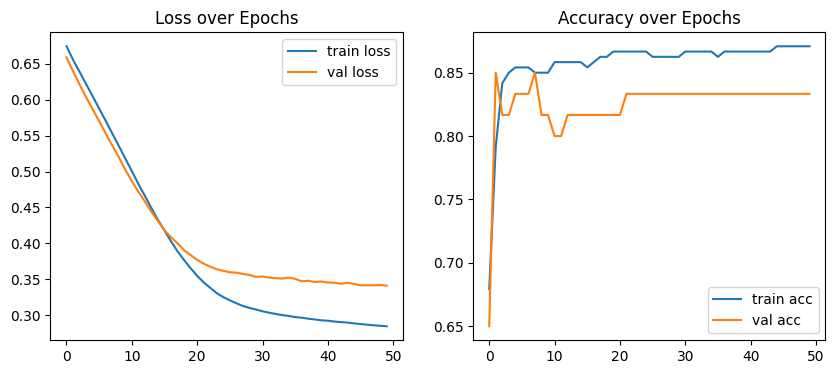

In [25]:
# Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss over Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

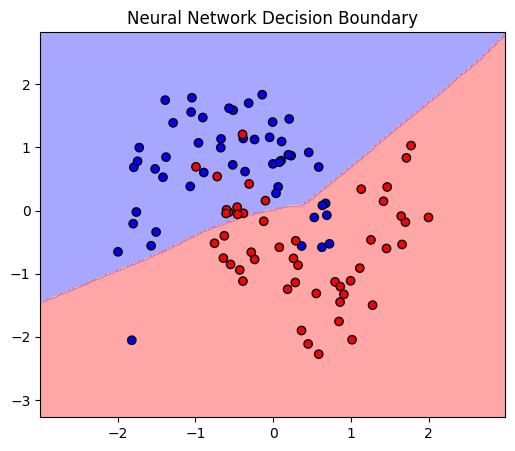

In [27]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid, verbose=0)
    Z = (preds > 0.5).astype(int).reshape(xx.shape)
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(model, X_test, y_test, "Neural Network Decision Boundary")

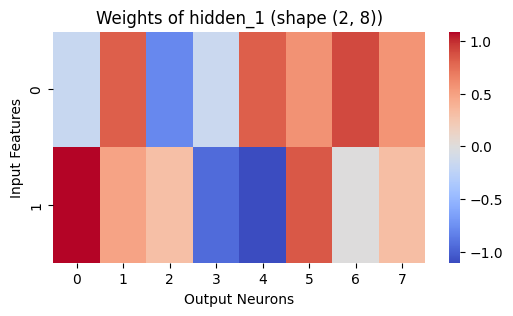

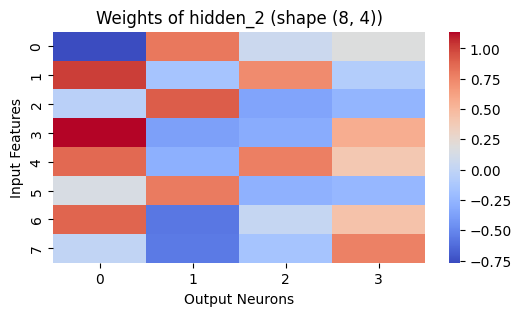

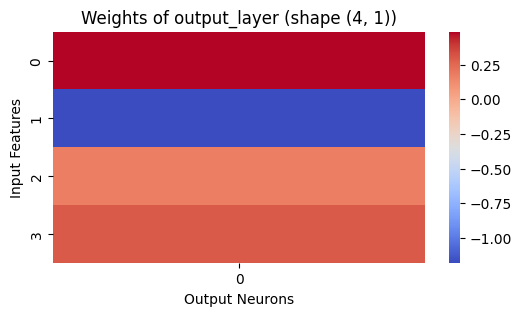

In [26]:
# Visualise learned weights
for layer in model.layers:
    if isinstance(layer, layers.Dense):
        weights, biases = layer.get_weights()
        plt.figure(figsize=(6,3))
        sns.heatmap(weights, cmap='coolwarm', annot=False)
        plt.title(f"Weights of {layer.name} (shape {weights.shape})")
        plt.xlabel("Output Neurons")
        plt.ylabel("Input Features")
        plt.show()


In [30]:
# Evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc:.3f}")


✅ Test Accuracy: 0.810


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

Activation output from layer 1 (input_layer) — shape (5, 8)
[[0.4670289  0.         1.5323932  0.48283887 0.         0.
  0.         0.        ]
 [0.19386494 0.29122272 0.         0.         0.87539744 0.7265043
  0.27356026 0.13410571]
 [1.0912203  0.29876938 0.2374091  0.         0.         1.1037322
  0.         0.11697909]
 [0.25778663 0.         0.5977626  0.3040707  0.0124099  0.
  0.         0.        ]
 [0.3745153  0.         0.2819692  0.05893961 0.19640353 0.3139988
  0.         0.        ]]

🔹 Layer 1 — hidden_1 — shape (5, 8)


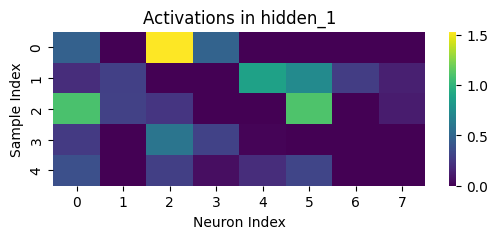


Activation output from layer 2 (hidden_1) — shape (5, 4)
[[0.4447655  1.773147   0.         0.        ]
 [1.5691025  0.37977508 0.6260785  0.43878514]
 [0.         2.038117   0.         0.        ]
 [0.45412904 0.81336606 0.         0.10179341]
 [0.3026496  0.90742135 0.         0.06391424]]

🔹 Layer 2 — hidden_2 — shape (5, 4)


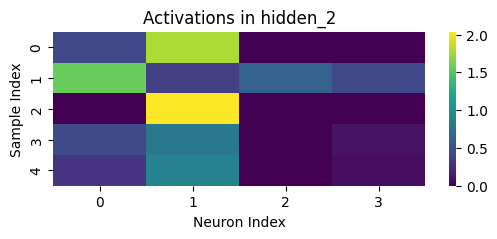


Activation output from layer 3 (hidden_2) — shape (5, 1)
[[0.14644217]
 [0.66032785]
 [0.09182061]
 [0.3549789 ]
 [0.31153136]]

🔹 Layer 3 — output_layer — shape (5, 1)


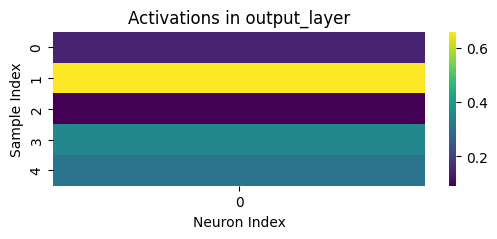

In [32]:
# Extract and visualise activations
activation_model = models.Model(inputs=model.input,
                                outputs=[layer.output for layer in model.layers if 'input' not in layer.name])

sample_data = X_test[:5]
activations = activation_model.predict(sample_data)

for i, act in enumerate(activations):
    layer_name = activation_model.layers[i+1].name   # skip input layer
    print(f"\nActivation output from layer {i+1} ({model.layers[i].name}) — shape {act.shape}")
    print(act)
    print(f"\n🔹 Layer {i+1} — {layer_name} — shape {act.shape}")
    plt.figure(figsize=(6,2))
    sns.heatmap(act, cmap='viridis', cbar=True)
    plt.title(f"Activations in {layer_name}")
    plt.xlabel("Neuron Index")
    plt.ylabel("Sample Index")
    plt.show()